# **Introduction**
Being a cricket fan, visualizing the statistics of cricket is mesmerizing.I was fascinated by the analysis done. Hence, I decided to get my first hands-on experience by building a classifier to predict the winning team of each IPL Match using Machine learning techniques.

1. [Importing Data](#t1.)
2. [Assess Data Quality & Missing Values](#t2.)
3. [Exploratory Data Analysis](#t3.)
4. [Encoding Categotical Features](#t4.)
5. [Feature Selection](#t5.)
6. [Model Building](#t6.)
7. [Model Testing](#t7.)

<a id="t1."></a>
# 1. Import Data & Python Packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
matches=pd.read_csv('matches.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [3]:
matches.shape

(756, 18)

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<a id="t2."></a>
# 2. Data Quality & Missing Value Assessment

In [5]:
# Checking the missing values in the dataset
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


#### We update this as No result 

In [7]:
matches['winner'].fillna('Draw', inplace=True)

In [8]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


#### From the venue we can conclude the city is Dubai

In [9]:
matches['city'].fillna('Dubai',inplace=True)

In [10]:
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### Converting the team names into their initials

In [11]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils',"Delhi Capitals",'Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants',"Rising Pune Supergiant",'Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)


matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


<a id="t3."></a>
# 3. Exploratory Data Analysis


#### Genral Analysis

In [12]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())     
print(' \n Teams :',matches['team1'].unique())

Total Matches Played: 756
 
 Venues Played At: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai'
 'Mohali' 'Bengaluru']
 
 Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


#### Most Player of the match

In [13]:
print(matches['player_of_match'].value_counts())

CH Gayle           21
AB de Villiers     20
MS Dhoni           17
RG Sharma          17
DA Warner          17
                   ..
MA Starc            1
SA Yadav            1
SB Jakati           1
AA Jhunjhunwala     1
RA Tripathi         1
Name: player_of_match, Length: 226, dtype: int64


#### Toss Decision in every season

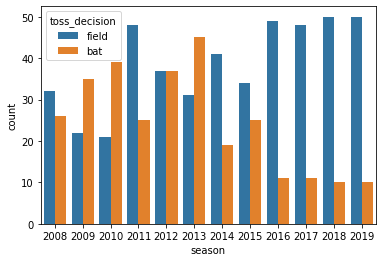

In [14]:
sns.countplot(x='season',hue='toss_decision',data=matches)

#### Most Toss winner

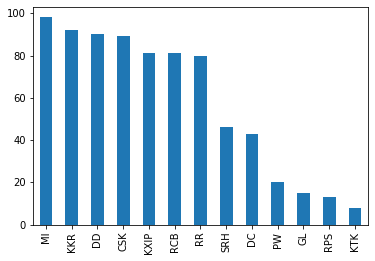

In [15]:
matches['toss_winner'].value_counts().plot(kind='bar')

#### Matches each season

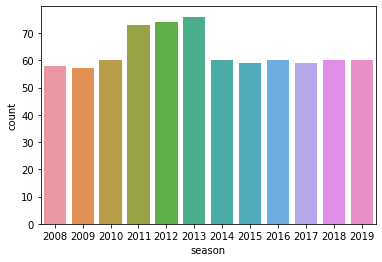

In [16]:
sns.countplot(matches['season'])

#### Most Wins

In [17]:
wins=pd.DataFrame(matches['winner'].value_counts()).reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,DD,77
6,RR,75
7,SRH,58
8,DC,29
9,RPS,15


#### Total Matches Played by each Team

In [18]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']],axis=1)
teams=(matches_played_byteams['team1'].value_counts()+matches_played_byteams['team2'].value_counts()).reset_index()
teams.columns=['team_name','Matches_played']
teams

,team_name,Matches_played
0,CSK,164
1,DC,75
2,DD,177
3,GL,30
4,KKR,178
5,KTK,14
6,KXIP,176
7,MI,187
8,PW,46
9,RCB,180


#### Matches played vs the win 

In [19]:
player=teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')

player.columns=['team','matches_played','wins']
player

,team,matches_played,wins
0,CSK,164,100
1,DC,75,29
2,DD,177,77
3,GL,30,13
4,KKR,178,92
5,KTK,14,6
6,KXIP,176,82
7,MI,187,109
8,PW,46,12
9,RCB,180,84


#### Percentage Win

In [20]:
player['%win']=(player['wins']/player['matches_played'])*100
player

,team,matches_played,wins,%win
0,CSK,164,100,60.975610
1,DC,75,29,38.666667
2,DD,177,77,43.502825
3,GL,30,13,43.333333
4,KKR,178,92,51.685393
5,KTK,14,6,42.857143
6,KXIP,176,82,46.590909
7,MI,187,109,58.288770
8,PW,46,12,26.086957
9,RCB,180,84,46.666667


#### Lucky grounds for Teams

In [21]:
def lucky(df,team_name):
    return df[df['winner']==team_name]['venue'].value_counts().nlargest(5)

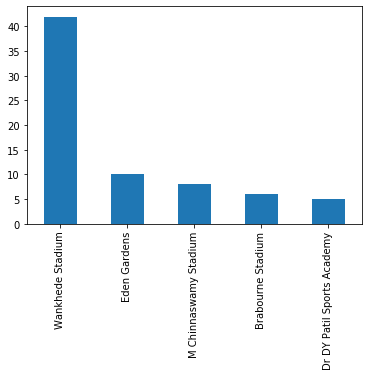

In [22]:
lucky(matches,'MI').plot(kind='bar')

 <a id="t4."></a>
 # 4. Encoding Categotical Features 

#### Encoding Teams

In [23]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


#### Encoding City

In [24]:
cat_list=matches["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  0  5  3  1  5  6  4  2  6  7  5  4  7  0  2  0  3  6  5
  1  2  6  5  1  4  6  8  1  2  8  0  5  1  7  6  7  4  0  7  4  8  0  8
  9  5  7  9  6  1  7  5  4  4  0  4  8  7  5  6 10  0 11  0  8  4 11  5
  8  4  6  7  0 10 11  0  8  5 10  4 11  5  7  6 10  4 11  0 10  8  6  5
  8  7  5  7 10  0  6  4  6  5 11  8  7 11  4  6 10  0  5  5  5 12 12 12
 12 13 14 12 14 12 14 14 13 12 14 13 15 14 14 15 15 16 14 13 17 13 17 16
 14 14 15 15 15 16 18 18 13 17 18 15 15 14 14 14 19 13 17 17 19 15 17 14
 14 15 15 15 17 17  5  5  8  6 11 20  4  6  7  4  7 21 20  5 21 11  5  4
  8  5 20  8  4 20  5  7  5 11  7  6  8 11  5  6  7 22 11 10  6  4  8 22
  4  7 10 22  5 11 10 11 23  4  6 23  7  6  5  5  5  5 11  0 24  7  5  6
 10  4  8  5  0 10  5 11  0  5  6 24  7  5  6  8  5  6  7  0 10 11  7  5
 24  7 10  4 24  6 10 11  5  7  0 11  5 24  0  4  6  5  4  8 10  0  8 10
 11  3  4  5 23  3  5 23 11  5  5 23  7  4  6  5  5 11 11 11  6  5 10  4
 25 10  1 25  4  7  5 11  8  6  7  1  6  4  5 10  4

#### Encoding Venue

In [25]:
cat_list1=matches["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)


[ 0  1  2  3  4  0  5  3  1  5  6  4  2  6  7  5  4  7  0  2  0  3  6  5
  1  2  6  5  1  4  6  8  1  2  8  0  5  1  7  6  7  4  0  7  4  8  0  8
  9  5  7  9  6  1  7  5  4  4  0  4 10  7  5  6 11  0 12  0 10  4 12 13
 10  4  6  7  0 11 12  0 10 13 11  4 12 13  7  6 11  4 12  0 11 10  6  5
 10  7  5  7 11  0  6  4  6  5 12 10  7 12  4  6 11  0  5  5 13 14 14 14
 14 15 16 14 16 14 16 16 15 14 16 15 17 16 16 17 17 18 16 15 19 15 19 18
 16 16 17 17 17 18 20 20 15 19 20 17 17 16 16 16 21 15 19 19 21 17 19 16
 16 17 17 17 19 19 13 22 10  6 12 23  4  6  7  4  7 24 23 22 24 12 22  4
 10 22 23 10  4 23 13  7 22 12  7  6 10 12 22  6  7 25 12 11  6  4 10 25
  4  7 11 25 22 12 11 12 26  4  6 26  7  6 13 13 13 13 12  0 27  7 13  6
 11  4 10 13  0 11  5 12  0 13  6 27  7  5  6 10  5  6  7  0 11 12  7 13
 27  7 11  4 27  6 11 12  5  7  0 12 13 27  0  4  6  5  4 10 11  0 10 11
 12  3  4  5 26  3 13 26 12 13  5 26  7  4  6  5  5 12 12 12  6  5 11  4
 28 11 29 28  4  7  5 12 10  6  7 29  6  4  5 11  4

In [26]:
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

Index(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Green Park',
       'Punjab Cricket Association Stadium, Mohali', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', 'St George's Park', 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium', 'Sardar Patel Stadium, Motera',
       'Barabati Stadium', 'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Si

#### Encoding Toss decision

In [27]:
cat_list2=matches["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


<a id="t5."></a>
# 5. Feature Selection

#### Dropping features which are not useful for prediction

In [28]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
df = pd.DataFrame(matches)
df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3
...,...,...,...,...,...,...,...
751,2,1,Mumbai,field,1,Wankhede Stadium,1
752,5,1,Chennai,bat,5,M. A. Chidambaram Stadium,1
753,10,7,Visakhapatnam,field,7,ACA-VDCA Stadium,7
754,7,5,Visakhapatnam,field,5,ACA-VDCA Stadium,5


#### Building predictive model , convert categorical to numerical data

In [29]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
753,10,7,32,1,7,0,7
754,7,5,32,1,5,0,5


<a id="t6."></a>
# 6. Model Building

#### Generalized Funtion

In [30]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    print(predictions)
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  

#### Logistic Regression

In [31]:
#logistic Regression
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression(multi_class="auto")
classification_model(model, df,predictor_var,outcome_var)

[ 9  1  1  9  5  9  1  5  9  1  2  3  9  2 10  1  9  5  9  1 10  2  2  1
  9  9  2  1  2  3  2  9  2  1  9  9  1  9  9  7  9  9  9  3  3  9  5  9
  9  1 10  9  2  9  5  1  9  3  5  3  6  5  1  2  6  5  3  3  3  3  5  2
 10  5  1  2  6  1  5  1  6  2  6  3  3  2  9  2  1  3  9  1  6  5  5  1
  9  3  1 10  1  1  2  3  2  1  5  3  3  5  3  2  1  5  6  6  2  3  5  9
  5  1  2  5  5  3  5  1  1  6  3  1  6  1  5  6  6  2  5  1  3  5  1  5
  9  5  6  6  6  5  2  5  1  1  5  1  6  3  5  5  9  1  1  9  6  6  5  2
  5  3  6  6  1  1  2  2  9  2  5  9  5  2  3  3  5  3  6  2  5  9  2  3
  9  2  6  5  3  6  2  5  2  5  5  2  6  5  2  5  5  6  5  6  5  3  5  1
  3 10  1  1  2  5  6  5  9  3  2  9  5  1  2  2  2  2  5  3  5  5 10  2
  6  3  9 10  1  1  6  5  6  9  2  9  5  6  2  9  1  2  9  1  9  9  2 10
  9  3  1  9 10  2  9  5  1  9  1  5  7  9  3  3  2  1  5 10  6 10  3  1
  5  9  3  1  9  9  7  5 10  2  1  3 10  3  2  1  1  1  5  3  2  9  9  3
  2  1 10  2  3  3  1  5  9  2  5 10  2  5  1  6  5

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\parva\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Conclusion
Accuracy score from logistic regression is 31.21 % ,which is a case of underfitting

Hence we will proceed with better alogorithms 

#### Gaussian NAive bayes algorithm

In [32]:
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)

[12 12 12 12  5 12  1  5 12 12 12  3 12 12  7 12  3  5 12 12 10 12 12 12
 12 12 12 12 12  8 12 12 12  1 12 12  1 12 12 12 12  3 12 12  3 12  1 12
 12 12  7 12 12 12  5 12  3  3  1  3  5  5  1  2  6  5 12 12 12  3  5 12
  5  5  2 12 12  5  5  5  6 12  6  3 12 12 12  2 12  3 12  1 12  5  2 12
 12 12  1  7 12 12  2  3 12 12  5 12 12  5  3  2 12  5 12  6 12  3  5  9
  3  1 12  5  5  3  5  2  1  6 12  1  6  2  2  6  6  2  5  1 12  1  1  5
 12  5  1  6  6  2 12  5  1 12  5  1  6 12  5  5  9  1 12 12  6  5  5 12
  5  6  1  6 12 12 12  2 12 12  5  6  3  2 12  3  5 12  5  2  5 12  2  3
 12 12  5  5  3  6 12  5 12  5  5  2  6  5  2  2  5  6  5  6  2  3  1  1
  3  7 12 12  2  5  6  5 12  3  2 12  5  2  2  2  2  2  5 12 10  2 13  2
  6  3 12 13 12 12 12  5 12 12 12 12  5 13 12 12 12 12 12 12 12 12 12 13
 12 12 12 12 10 12 12  5 12 12 12  5 12 12 12  3  2 12  9 10 12 10 12 12
  5 12  3  1 12 12 12  7 10 12  1 12 10  3 12 12  1  3  5 12 12 12 12  3
 12 12 13  2  3 12 12  5 12  2  5 10 12  5 12  5 10

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Conclusion
Accuracy score from Gaussian Naive Bayes is 19.312 % ,which is a case of underfitting

Hence we will proceed with better alogorithms 

#### KNN Algorithm

In [33]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


[10  3  3  9  3 10  1  9 11  1  2  1  9  2  9  9  3  2 10  3 10  1  8  1
 11  9  2 11  2  3  2 10  2  1  9 10  1 11  7  2  7  9  9  1  2  8 10  9
  7  9 10  7  1 11  4 11  2  1 10  3  5  7  1  2  6  7  5  6  9  6  5  1
  9  3  1  3  9  6  5  4  2  1  6  9  5  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  2  1  5  7  6  9  5  9  1  5  3  2  6  7  6  1  6  1  1  9
  4  4  2  4  7  2  3  3  2  7  3  1  5  4  9  5  5  1  3  5  3  2  4  5
  5  3  2  5  5  7  9  4  1  4  4  3  1  3  4  3  9  1  4  3  7  4  3  2
  3  7  3  2  4  4  1  1  9  2  3  6  3  2  1  3  5  4  6  1  4  5  1  3
  9  1  6  1  3  6  1  2  1  5  7  2  2  5  1  2  2  6  1  6  2  3  1  4
  3  9  6  4  1  5  6  5  4  1  2  4  4  2  1  3  2  5  2  6  3  1 13  2
  6  1  9 13  4  2  1  5  9  4  2  4  4  1  2  9  5  2  9  1  6  5  3  2
  4  3  6  3  7  2  6  5  1 10  1  5  1  2  6  9  2  1  3 10  6 10  9  2
  5  9  3  1  9  9  2  5  5  2  1  4  7  3  1  5  1  1  5  5  7 11  6  7
  1  2 13  1  3  7  1  5  9  2  4  4  2  3  1  6  3

#### Conclusion 
Accuracy score from KNN is 66.005% ,which could be used for predictions

Still we will proceed with better algorithm


#### Decision Tree 

In [34]:
#Decision tree algorithm
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  2
  7  9  7 10  1 11  3 11  2  1  1  3  5  6  1  2  6  7  1  6  9  6  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  3  4  7  9  4  1  6  3  9  7  5  1  3  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  3  1  4
  3  9  6  4  1  5  3  5  4  1  2  5  4  1  1  5  3  5  2  6  3  1 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  5 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  1  7 13  6  3
  5  2  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

#### Conclusion
Accuracy score of Decision Tree is 87.963, but decision tree tends to overfit

We can proceed to ensemble techniques

#### Random Forest

In [35]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  8  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  7  1  2  6  7  1  6  9 14  5  4
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  7  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  3  4  7  9  4  1  6  3  9  7  5  1  3  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  7  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  4  2  1  5  7  2  3  5  1  9  7  6  1  6  2  3  9  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  1  1  5  3  5  2  6  3  1 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  5  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  1  7 13  6  7
  5  2  9  1  3  7  1  5  9  2  4 13  2  6  1  6  3

Random forest tends to overfit ,hence we will tune its parameter

#### Hyper-parameter Tuning of Random forest

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [38]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [39]:
X=df.drop(['winner'],axis=1)
y=df['winner']

In [40]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 22,
 'bootstrap': False}

In [42]:
#Random forest classifier
model = RandomForestClassifier(**{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 22,
 'bootstrap': True})
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\parva\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


[10  1  2  9  3 10  1  9 11  1  2  1  8  2  7  1  3  2 10  3 10  1  8  1
 11  9  3  1  2  3  2  9  3  1  9  2  1 11  7  2  7  3 10  1  2  8  1  9
  7  1  7 10  1 11  3  1  2  1  1  3  5  7  1  2  6  7  1  6  9  6  5  1
  9  5  1  3  9  6  5  4  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  7  3  1  2  3  6  1  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  2  5  2  4  5  2  9  4  7  9  4  1  6  2  1  7  6  1  9  6  5  2  1  5
  9  7  4  6  5  1  9  5  1  7  4  3  1  4  5  1  9  1  4  9  7  2  3  2
  5  1  3  4  3  3  2  1  7  2  5  7  3  2  1  3  5  9  6  1  4  5  1  3
  9  1  6  2  3  6  1  2  1  5  7  2  3  5  1  2  7  6  5  6  2  3  1  5
  3  7  6  3  1  5  6  5  4  1  2  5  4  1  1  5  3  1  5  6  3  7 13  2
  6  1  9 13  4  2  1  5  9  7  2 12  4  1  2  9  1  3  9  1  6  5  3  5
 12  7  6  3  7  2  6  5  1 10  2  5  1  2  7  3  2  1  3 10  6 10  9  3
  5  9  3  1  7 12  4  9  5  2  1  9  7  3  1  5  1  1  5  1  7  1  6  3
  5  2 13  1  3  7  1  5  9  2  4  5  2  3  1  6  3

#### Conclusion
Accuracy score of of random forest after hyperparameter tuning is 71.693%

Hnece can be used for predictions

#### Gradient Boosting

In [43]:
#Gradient boost algorithm
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
classification_model(model, df,predictor_var,outcome_var)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[10 11  2  9  3 10  1  9  7 10  2  1  8  2  9  1 11  2 10  3 10  1  8  1
 11  9  3 11  2  8  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  7  1  2  6  7  5  6  9 14  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  7  6  9  5  9  1  5  4  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  4  1  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  1  1  5  3  5  5  6  3  7 13  2
  6  1  5 13  4  2 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  7  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  5  2 13  6  7
  5  2 13  1  3  5  1  5  9  2  4 13  2  6  1  6  3

Gradient Boosting algorithm tends to overfit , hence we will tune its parameter for better results

#### Hyper-parameter Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
param_dist = {'max_features' : ['log2',1.0],
              'max_depth' : [3, 5, 7, 10],
              'min_samples_leaf' : [2, 3, 5, 10],
              'n_estimators': [50, 100,200,300,500,1000],
              'learning_rate' : [0.0001,0.001,0.01,0.05,0.1,0.3],
              }

In [46]:
pre_gb_model = RandomizedSearchCV(GradientBoostingClassifier(warm_start=True), 
                                  param_distributions = param_dist,
                                  cv=3, n_iter = 30, n_jobs=-1)

In [47]:
X=df.drop(['winner'],axis=1)
y=df['winner']

In [48]:
pre_gb_model.fit(X,y)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(warm_start=True),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['log2', 1.0],
                                        'min_samples_leaf': [2, 3, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 500,
                                                         1000]})

In [49]:
pre_gb_model.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 7,
 'learning_rate': 0.01}

In [64]:
model= GradientBoostingClassifier(**{'n_estimators': 200,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 7,
 'learning_rate': 0.01})
classification_model(model, df,predictor_var,outcome_var)

C:\Users\parva\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[10 11  2  9  3 10  1  9  7 10  2  1  8  2  9  1 11  2 10  3 10  1  8  1
 11  9  3 11  2  8  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  7  1  2  6  7  5  6  9 14  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  7  6  9  5  9  1  5  4  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  7  3  2  1  3  5  4  6  1  4  9  1  3
  6  1  6  9  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  4  1  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  1  1  5  3  5  2  6  3  7 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  5  3  9  1  6  5  3  5
  4  7  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  5  7 13  6  7
  5  2  9  1  3  7  1  5  9  2  4 13  2  6  1  6  3

#### Conclusion
Accuracy of Gradeint boosting is 87.302% after hyper-paramter tuning .
which is maximum of all the algorithm
Hence we will use Gradient Boosting as our final algorithm

#### Feature importance

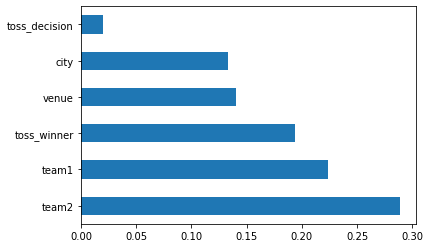

In [77]:
feat_importances = pd.Series(model.feature_importances_, index=predictor_var)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

<a id="t7."></a>
# 7. Model Testing

In [66]:
test=pd.read_csv("test_IPL.csv")
test.head()

,team1,team2,venue,toss_winner,city,toss_decision,date,winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR
2,KKR,MI,3,MI,3,0,05-May,MI
3,CSK,MI,7,CSK,7,1,07-May,MI
4,DC,CSK,24,CSK,22,1,10-May,CSK


In [67]:
test = test.drop(["date","winner"], axis=1,inplace=False)

In [68]:
test.replace(encode, inplace=True)
test.head(2)

,team1,team2,venue,toss_winner,city,toss_decision
0,9,1,3,1,3,0
1,10,6,5,6,5,0


In [69]:
out = model.predict(test)

In [70]:
out

array([1, 6, 1, 5, 5], dtype=int64)

In [71]:

dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search

1
MI


In [72]:
predicted_winner=[]
for i in out:
    #print(list(dicVal.keys())[list(dicVal.values()).index(i)])
    predicted_winner.append(list(dicVal.keys())[list(dicVal.values()).index(i)])

In [73]:
ipl=pd.read_csv('test_IPL.csv')
ctr=0
k=0
total=len(ipl['winner'])
for i in ipl['winner']:
    if i==predicted_winner[k]:
        ctr=ctr+1
    k=k+1  
print(ctr)
print("Accuracy of our prediction of recent IPL is ", ctr/total)

4
Accuracy of our prediction of recent IPL is  0.8


In [74]:
predicted_winner

['MI', 'RR', 'MI', 'CSK', 'CSK']

In [75]:
sub = pd.DataFrame()
sub['team1'] = ipl['team1']
sub['team2'] = ipl['team2']
sub['venue'] = ipl['venue']
sub['toss_winner'] =ipl['toss_winner']
sub['city'] = ipl['city']
sub['toss_decision'] = ipl['toss_decision']
sub['date of match']=ipl['date']
sub['actual_winner']=ipl["winner"]
sub['Predicted_winner'] = predicted_winner
sub.to_csv('ipl2.csv',index=False)

In [76]:
sub.head(5)

,team1,team2,venue,toss_winner,city,toss_decision,date of match,actual_winner,Predicted_winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR,RR
2,KKR,MI,3,MI,3,0,05-May,MI,MI
3,CSK,MI,7,CSK,7,1,07-May,MI,CSK
4,DC,CSK,24,CSK,22,1,10-May,CSK,CSK
